# Model Development II

## Setup

### Importing Required Libraries

In [1]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

### Importing the dataset

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
filename = download_file(data_url)

Downloading: 100.00% (20119 / 20119 bytes)
Download Complete.


<p>Load the dataset into a <code>pandas.DataFrame</code>.</p>

In [4]:
df = pd.read_csv(filename, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## Task 1 - Single Linear Regression

<p>You have learnt that <code>CPU_frequency</code> is the parameter with the lowest P-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of <code>CPU_frequency</code> and <code>Price</code> to find the model for prediction.</p>

In [5]:
x = df[["CPU_frequency"]]
y = df["Price"]

lm = LinearRegression()
lm.fit(x, y)
y_hat = lm.predict(x)

<p>Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?</p>

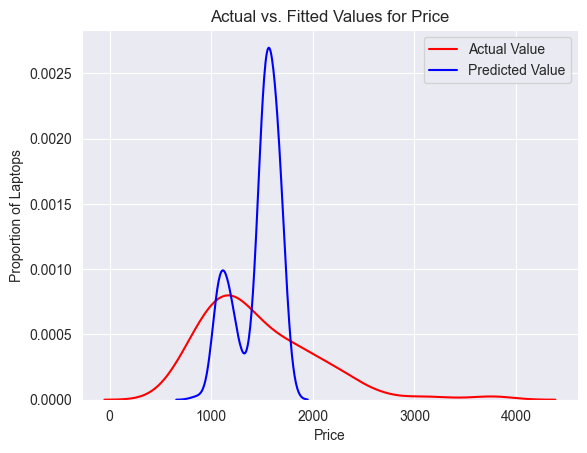

In [6]:
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(y_hat, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs. Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptops")
plt.legend(["Actual Value", "Predicted Value"])

<p>Evaluate the Mean Squared Error and $R^2$ score values for the model.</p>

In [7]:
print(f"The R-square for Linear Regression is: {lm.score(x, y)}, and the mean squared error of price and predicted value is {mean_squared_error(y, y_hat)}.")

The R-square for Linear Regression is: 0.1344436321024326, and the mean squared error of price and predicted value is 284583.4405868629.


## Task 2 - Multiple Linear Regression

<p>The parameters which have a low enough P-value so as to indicate strong relationship with the <code>Price</code> value are <code>CPU_frequency</code>, <code>RAM_GB</code>, <code>Storage_GB_SSD</code>, <code>CPU_core</code>, <code>OS</code>, <code>GPU</code> and <code>Category</code>. Use all these variables to create a Multiple Linear Regression system.</p>

In [8]:
lm1 = LinearRegression()
z = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "CPU_core", "OS", "GPU", "Category"]]
lm1.fit(z, y)
y_hat = lm1.predict(z)

<p>Plot the Distribution graph of the predicted values as well as the Actual values.</p>

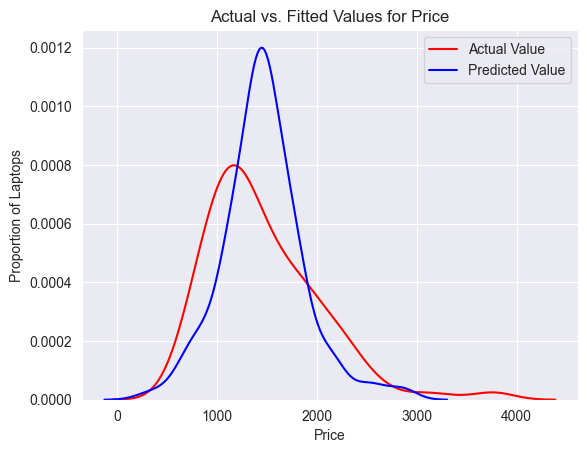

In [9]:
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(y_hat, color="b", label="Fitted Values", ax=ax1)

plt.title("Actual vs. Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptops")
plt.legend(["Actual Value", "Predicted Value"])

<p>Find the $R^2$ score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?</p>

In [10]:
print(f"The R-square for Multiple Linear Regression is {lm1.score(z, y)}, and the MSE value of price and predicted value is {mean_squared_error(y, y_hat)}.")

The R-square for Multiple Linear Regression is 0.5082509055187376, and the MSE value of price and predicted value is 161680.57263893104.


## Task 3 - Polynomial Regression

<p>Use the variable <code>CPU_frequency</code> to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using <code>numpy.polyfit()</code>.</p>

In [11]:
x = x.to_numpy().flatten()
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(x, y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(x, y, 5)
p5 = np.poly1d(f5)

<p>Plot the regression output against the actual data points to note how the data fits in each case. To plot the polynomial response over the actual data points, you have the function shown below.</p>

In [12]:
def plot_polly(model: np.poly1d, independent_variable: pd.Series, dependent_variable: pd.Series, name: str) -> None:
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, ".", x_new, y_new, "-")
    plt.title(f"Polynomial Fit with Matplotlib for Price ~ {name}")
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))

    plt.xlabel(name)
    plt.ylabel("Price of Laptops")

<p>Call this function for the 3 models created and get the required graphs.</p>

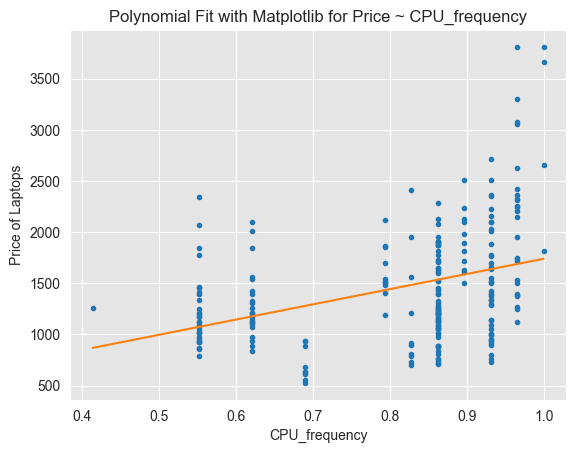

In [13]:
plot_polly(p1, x, y, "CPU_frequency")

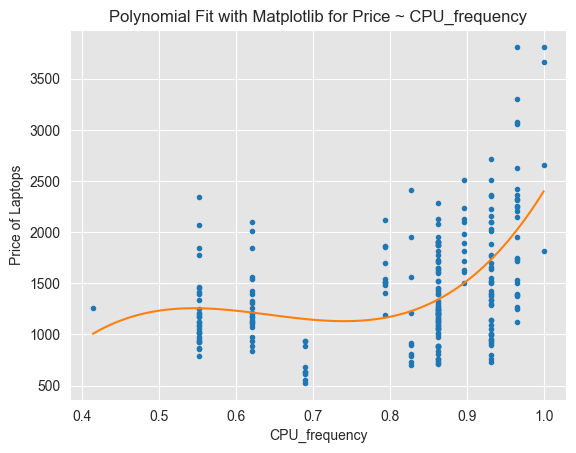

In [14]:
plot_polly(p3, x, y, "CPU_frequency")

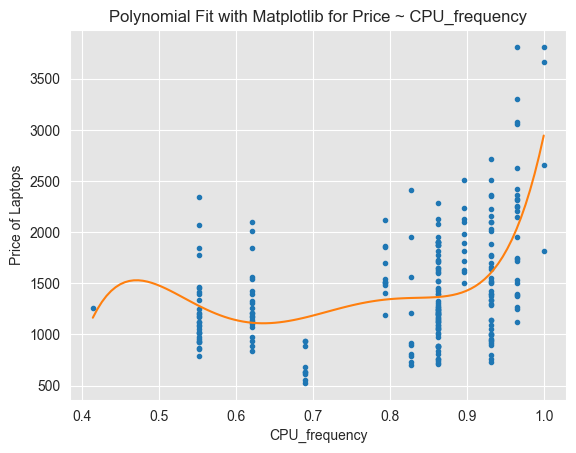

In [15]:
plot_polly(p5, x, y, "CPU_frequency")

<p>Also, calculate the $R^2$ and MSE values for these fits. For polynomial functions, the function <code>sklearn.metrics.r2_score()</code> will be used to calculate $R^2$ values.</p>

In [16]:
print(f"The R-square value for 1st degree polynomial is {r2_score(y, p1(x))}, and the MSE value for 1st degree polynomial is {mean_squared_error(y, p1(x))}.")

The R-square value for 1st degree polynomial is 0.1344436321024326, and the MSE value for 1st degree polynomial is 284583.4405868629.


In [17]:
print(f"The R-square value for 3rd degree polynomial is {r2_score(y, p3(x))}, and the MSE value for 3rd degree polynomial is {mean_squared_error(y, p3(x))}.")

The R-square value for 3rd degree polynomial is 0.2669264079653113, and the MSE value for 3rd degree polynomial is 241024.86303848765.


In [18]:
print(f"The R-square value for 5th degree polynomial is {r2_score(y, p5(x))}, and the MSE value for 5th degree polynomial is {mean_squared_error(y, p5(x))}.")

The R-square value for 5th degree polynomial is 0.3030822706443915, and the MSE value for 5th degree polynomial is 229137.29548053455.


## Task 4 - Pipeline

<p>Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.</p>

In [19]:
input_ = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(include_bias=False)), ("model", LinearRegression())]
pipe = Pipeline(input_)
z = z.astype(float)
pipe.fit(z, y)
y_pipe = pipe.predict(z)

<p>Evaluate the MSE and $R^2$ values for the this predicted output.</p>

In [20]:
print(f"The MSE value for multi-variable polynomial pipeline is {mean_squared_error(y, y_pipe)}, and the R-square for multi-variable polynomial pipeline is {r2_score(y, y_pipe)}.")

The MSE value for multi-variable polynomial pipeline is 120595.86128028373, and the R-square for multi-variable polynomial pipeline is 0.6332094535859658.


<p>You should now have seen that the values of $R^2$ increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better $R^2$ value.</p>

****
This is the end of the file.
****